# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

An algorithm separates data into two groups, measures how well the separation performs, and continues to do this with different points of separation.


2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees handle non-linear relationships very well because they are best suited to caputure complex patterns in data, whereas linear models assume a straight-line reltionship.


3. Why is the Gini a good loss function for categorical target variables?

Measures "impurity" by calculating the probability of incorrect classification.


4. Why do trees tend to overfit, and how can this tendency be constrained?

Overfitting occurs because trees generate complex branches to classify the data even if those patterns can not be generalized to new data. This can be constrained through pruning branches to avoid overly complex splits and setting a maximum depth to limit the depth of the tree.


5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False, trees perform well with both categorical and continuous variables, as they can split the feature space regardless.


6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Binary splits simplify the algorithm and make it easier to compute, and can also reduce the potential for overfitting.


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Overfitting = tree has many branches, model performs much better on training data, and has a lot of small leaves.
Underfitting = tree is very shallow, performs poorly on training and test data, and has few splits.

Use cross-validation, check training vs. test data performance, and look at the tree's visual appearance.


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [1]:
import pandas as pd

data = pd.read_csv("cars_hw.csv")
data.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [3]:
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
data_dummies = pd.get_dummies(data, columns = categorical_vars, drop_first = True)

print(data_dummies.head())


   Unnamed: 0  Make_Year  Mileage_Run  Seating_Capacity   Price  Make_Datsun  \
0           1       2017        44611                 5  657000        False   
1           2       2016        20305                 5  682000        False   
2           3       2019        29540                 5  793000        False   
3           4       2017        35680                 5  414000        False   
4           5       2017        25126                 5  515000        False   

   Make_Ford  Make_Honda  Make_Hyundai  Make_Jeep  ...  Body_Type_suv  \
0      False       False         False      False  ...          False   
1      False       False          True      False  ...          False   
2      False        True         False      False  ...           True   
3      False       False         False      False  ...          False   
4      False       False          True      False  ...          False   

   No_of_Owners_2nd  No_of_Owners_3rd  Fuel_Type_petrol  Fuel_Type_petrol+cng  \

In [6]:
from sklearn.model_selection import train_test_split

X = data_dummies.drop('Price', axis = 1)
y = data_dummies['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 780
Test set size: 196


In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

r2_scores = []
for min_samples_leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf, random_state = 42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((min_samples_leaf, r2))

best_min_samples_leaf = max(r2_scores, key=lambda x: x[1])
print(f"Best min_samples_leaf: {best_min_samples_leaf[0]}, R^2: {best_min_samples_leaf[1]}")


Best min_samples_leaf: 8, R^2: 0.8213135837522154


R^2 on test set: 0.7926958550870222
RMSE on test set: 154197.43494216682


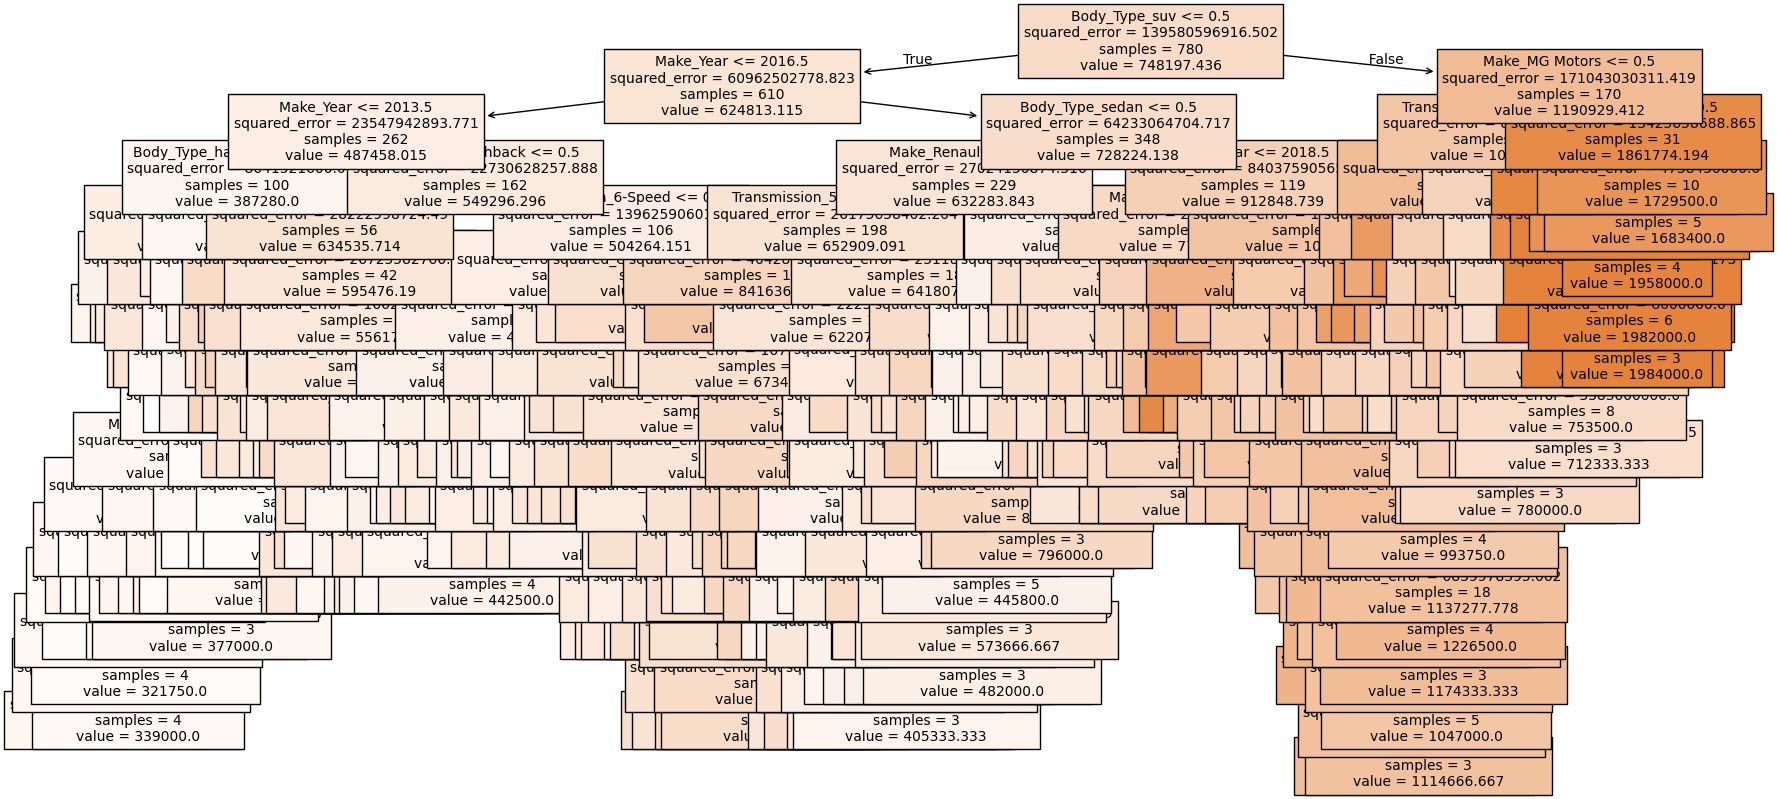

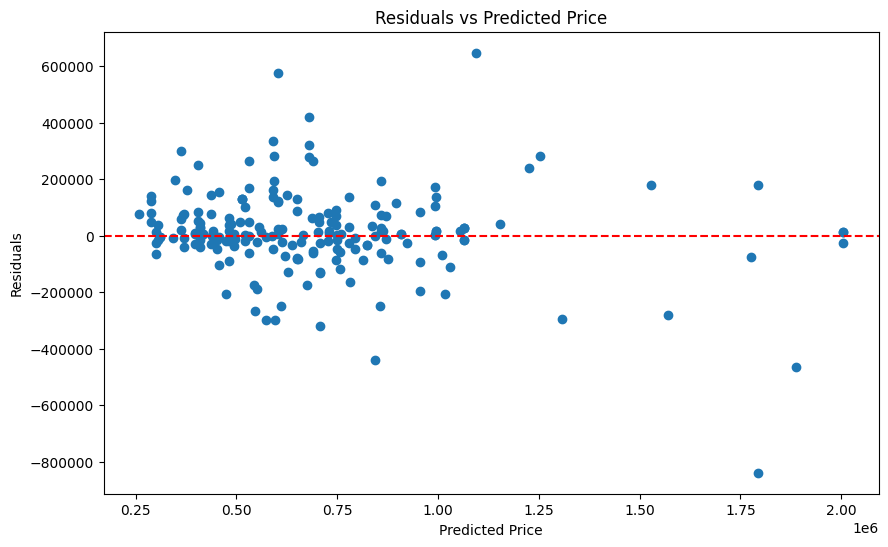

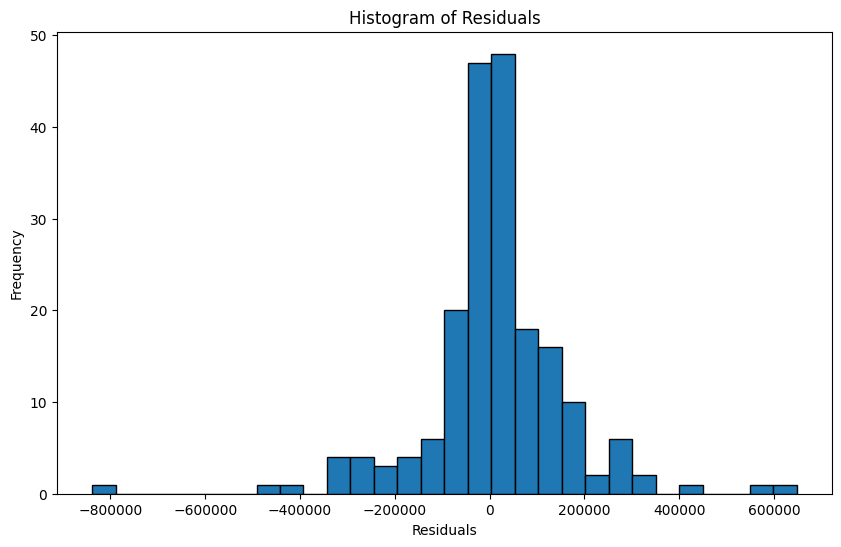

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

optimal_model = DecisionTreeRegressor(min_samples_leaf = 3, random_state = 42)
optimal_model.fit(X_train, y_train)

y_pred = optimal_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2 on test set: {r2}")
print(f"RMSE on test set: {rmse}")

plt.figure(figsize=(20, 10))
plot_tree(optimal_model, filled = True, feature_names = X.columns, fontsize = 10)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize = (10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()

plt.figure(figsize = (10, 6))
plt.hist(residuals, bins = 30, edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

lr_r2 = r2_score(y_test, y_lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
print(f"Linear Regression R^2: {lr_r2}")
print(f"Linear Regression RMSE: {lr_rmse}")


Linear Regression R^2: 0.8163910583949119
Linear Regression RMSE: 145117.59426198687


In [9]:
print(f"Decision Tree R^2: {r2}, RMSE: {rmse}")
print(f"Linear Regression R^2: {lr_r2}, RMSE: {lr_rmse}")


Decision Tree R^2: 0.7926958550870222, RMSE: 154197.43494216682
Linear Regression R^2: 0.8163910583949119, RMSE: 145117.59426198687


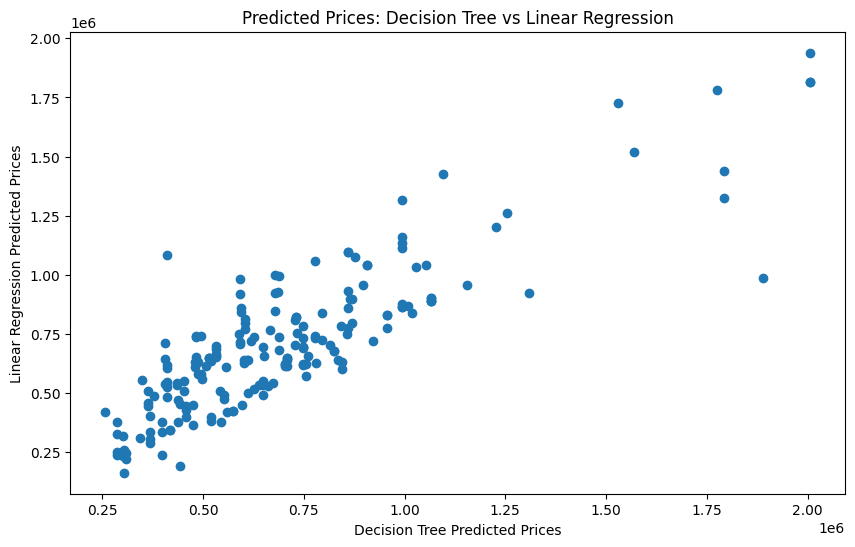

In [10]:
y_tree_pred = optimal_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_tree_pred, y_lr_pred)
plt.xlabel('Decision Tree Predicted Prices')
plt.ylabel('Linear Regression Predicted Prices')
plt.title('Predicted Prices: Decision Tree vs Linear Regression')
plt.show()


In [ ]:
# The linear regression seems to have performed better due to R^2 value being closer
# to 1.0 and its RMSE value being lower.


**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [11]:
import pandas as pd

data = pd.read_csv("corporate_ratings.csv")
data.head()


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


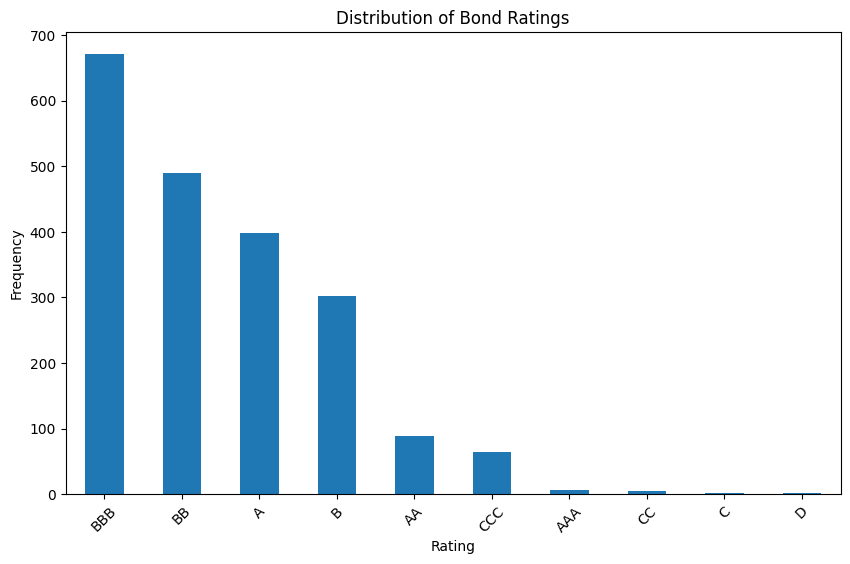

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Bond Ratings')
plt.xticks(rotation=45)
plt.show()


In [13]:
rating_mapping = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
}

data['Rating'] = data['Rating'].map(rating_mapping)

print(data['Rating'].value_counts())


Rating
B    1463
A     494
C      71
Name: count, dtype: int64


In [14]:
X = data.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])

X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

y = data['Rating']

print(f"Feature matrix shape: {X.shape}")


Feature matrix shape: (2029, 36)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1623
Test set size: 406


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

model = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


TypeError: '<' not supported between instances of 'float' and 'str'

In [18]:
print(f"Data type of y_test: {y_test.dtype}")
print(f"Data type of y_pred: {y_pred.dtype}")


Data type of y_test: object
Data type of y_pred: object


In [19]:
y_test_cleaned = y_test.str.strip().str.upper()
y_pred_cleaned = [str(pred).strip().upper() for pred in y_pred]

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_cleaned, y_pred_cleaned)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_cleaned)
print("Confusion Matrix:")
print(conf_matrix)


TypeError: '<' not supported between instances of 'float' and 'str'

In [20]:
print("Unique values in y_test:", y_test_cleaned.unique())
print("Unique values in y_pred:", pd.Series(y_pred_cleaned).unique())

y_test_cleaned = y_test_cleaned.astype(str).str.strip().str.upper()
y_pred_cleaned = [str(pred).strip().upper() for pred in y_pred_cleaned]

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_cleaned, y_pred_cleaned)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_cleaned)
print("Confusion Matrix:")
print(conf_matrix)


Unique values in y_test: ['B' 'A' 'C' nan]
Unique values in y_pred: ['B' 'A' 'C']
Accuracy: 0.6822660098522167
Confusion Matrix:
[[ 47  49   0   0]
 [ 59 227   8   0]
 [  1  11   3   0]
 [  1   0   0   0]]


In [23]:
y_test.dropna()


,Rating
1356,B
984,B
859,A
1983,B
1293,B
...,...
892,C
416,A
1843,B
1553,B


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

model = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


TypeError: '<' not supported between instances of 'float' and 'str'

In [25]:
X_with_agency = data.drop(columns=['Rating', 'Date', 'Name', 'Symbol'])
X_with_agency = pd.get_dummies(X_with_agency, columns=['Sector', 'Rating Agency Name'], drop_first=True)

X_train_agency, X_test_agency, y_train_agency, y_test_agency = train_test_split(X_with_agency, y, test_size=0.2, random_state=42)

model_with_agency = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
model_with_agency.fit(X_train_agency, y_train_agency)

y_pred_agency = model_with_agency.predict(X_test_agency)

accuracy_agency = accuracy_score(y_test_agency, y_pred_agency)
print(f"Accuracy with Rating Agency as feature: {accuracy_agency}")

conf_matrix_agency = confusion_matrix(y_test_agency, y_pred_agency)
print("Confusion Matrix with Rating Agency as feature:")
print(conf_matrix_agency)


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
# I tried everything I could think of to fix the error but it won't go away :(


**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?